In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/с доп.данными/ready_all_df (2).csv')
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10391 entries, 0 to 10390
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   author                9562 non-null   object
 1   author_type           9571 non-null   object
 2   url                   9904 non-null   object
 3   location              9904 non-null   object
 4   deal_type             9904 non-null   object
 5   accommodation_type    9904 non-null   object
 6   floor                 9904 non-null   object
 7   floors_count          9904 non-null   object
 8   rooms_count           9904 non-null   object
 9   total_meters          9904 non-null   object
 10  price                 9891 non-null   object
 11  year_of_construction  7906 non-null   object
 12  object_type           7906 non-null   object
 13  have_loggia           7906 non-null   object
 14  parking_type          7906 non-null   object
 15  house_material_type   7906 non-null 

In [ ]:
df.columns

Index(['author', 'author_type', 'url', 'location', 'deal_type',
       'accommodation_type', 'floor', 'floors_count', 'rooms_count',
       'total_meters', 'price', 'year_of_construction', 'object_type',
       'have_loggia', 'parking_type', 'house_material_type', 'heating_type',
       'finish_type', 'living_meters', 'kitchen_meters', 'phone',
       'ceiling_height', 'district', 'street', 'house_number', 'underground',
       'residential_complex'],
      dtype='object')

# **Названия колонок**


  author - автор

  author_type - тип автора

  url - URL

  location - местоположение

  deal_type - тип сделки

  accommodation_type - тип жилья

  floor - этаж

  floors_count - количество этажей

  rooms_count - количество комнат

  total_meters - общая площадь

  price - цена

  year_of_construction - год постройки

  object_type - тип объекта

  have_loggia - есть лоджия

  parking_type - тип парковки

  house_material_type - тип материала дома

  heating_type - тип отопления

  finish_type - тип отделки

  living_meters - жилая площадь

  kitchen_meters - площадь кухни

  phone - телефон

  ceiling_height - высота потолков

  district - район

  street - улица

  house_number - номер дома

  underground - метро

  residential_complex - жилой комплекс


# Очистка данных

Очистка от дубликатов

In [ ]:
number_of_duplicates = df.duplicated().sum()
print(f'Количество дубликатов {number_of_duplicates}')

Количество дубликатов 816


In [ ]:
df.drop_duplicates(inplace=True)
print(f'Осталось {df.shape[0]} строчек ')

Осталось 9575 строчек 


In [ ]:
number_of_duplicates = df.duplicated().sum()
print(f'Количество дубликатов {number_of_duplicates}')

Количество дубликатов 0


видим, что график не соответствует реальности. heating type отсутствует, а все потому что пустые значения заполнены -1 а не nan

<Axes: >

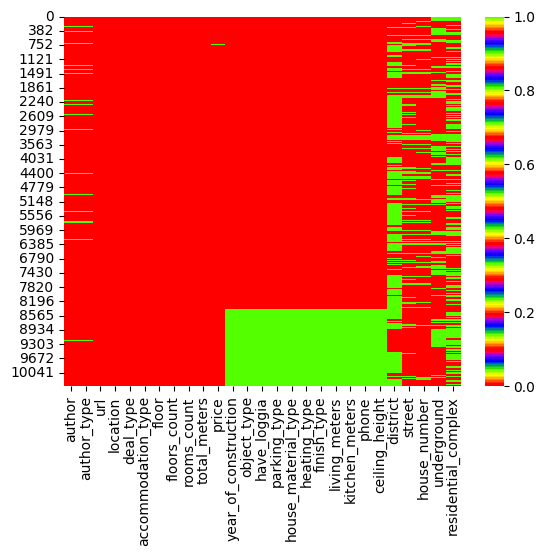

In [ ]:
sns.heatmap(df.isnull(), cmap='prism')

Надо заменить все значения '-1' на np.nan в каждой колонке

In [ ]:
for column in df.columns:
  df[column].replace('-1', np.nan, inplace=True)

<ipython-input-10-55f6ffa464a1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace('-1', np.nan, inplace=True)


Теперь уже больше похоже на правду. Теперь мы явно видим что вся колонка heating_type отсутствует

<Axes: >

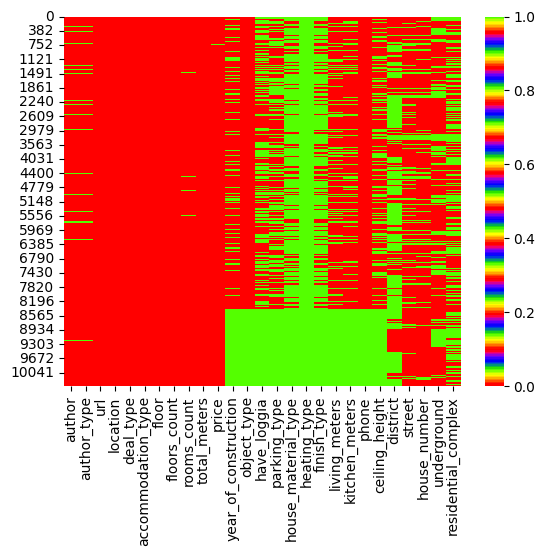

In [ ]:
sns.heatmap(df.isnull(), cmap='prism')

Необходимы точные значения в процентах, чтобы понять от каких колонок можно избавиться
Нет смысла работать с колонками, где значения отсутствуют больше чем на 70%

In [ ]:
procentage = (df.isnull().sum() / len(df)*100).astype(int)
sort = procentage.sort_values(ascending=False)
sort

,0
heating_type,99
house_material_type,85
finish_type,80
district,60
parking_type,55
have_loggia,54
residential_complex,51
ceiling_height,48
living_meters,38
year_of_construction,34


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
heating_type,9574
house_material_type,8189
finish_type,7666
district,5799
parking_type,5332
have_loggia,5241
residential_complex,4953
ceiling_height,4662
living_meters,3699
year_of_construction,3313


Все что **выше 75** процентов необходимо удалить.
Значит, необходимо удалить колонки `**heating_type**` и `**house_material_type**`  и  **`'finish_type'`**
А также house_number, url и phone

In [ ]:
useless_columns = ['house_material_type', 'heating_type', 'finish_type', 'house_number', 'url', 'phone']
for column in useless_columns:
  df.drop([column], axis=1, inplace=True)

<Axes: >

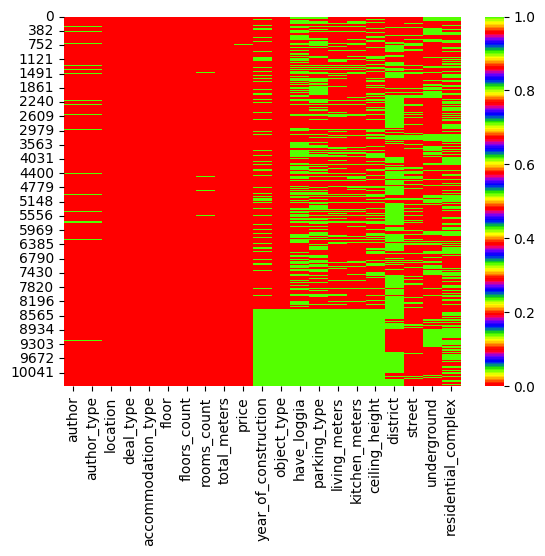

In [ ]:
sns.heatmap(df.isnull(), cmap='prism')

# Не все колонки имеют нужные типы.
**Нужно** понять какие можно оставить типом object а какие преобразовать в int и float**


```
object: 'author', 'author_type', 'url', 'location', 'deal_type',
       'accommodation_type', 'object_type' : object,
       'have_loggia' : object, 'parking_type' : object, 'finish_type' : object,  'phone' : object, , 'district' : object, 'street' : object,
       'house_number', 'underground' : object, 'residential_complex' : object


int: 'floors_count', 'rooms_count', 'price', 'floor', 'year_of_construction'

float:  'total_meters', 'living_meters',
       'kitchen_meters', 'ceiling_height'

```

Прежде чем преобразовать в числовой формат, колонки 'living_meters',
       'kitchen_meters', 'ceiling_height' изменить и убрать обозначение м

In [ ]:
df.head()

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,...,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,ID 115709096,homeowner,Серпухов,sale,flat,6,6,1,20.7,2350000,...,Вторичка,NaN,Наземная,18 м²,1 м²,3 м,Серпухов,Крюкова,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,Серпухов,sale,flat,1,9,1,33.0,4150000,...,Вторичка,NaN,NaN,18 м²,6 м²,"2,7 м",NaN,Ворошилова,Аннино,NaN
2,ID 3246838,realtor,Серпухов,sale,flat,4,4,1,14.0,1700000,...,Вторичка,NaN,NaN,NaN,NaN,NaN,Красный Текстильщик мкр,Красный Текстильщик,NaN,NaN
3,ID 64398571,unknown,Серпухов,sale,flat,5,5,1,17.5,2500000,...,Вторичка,NaN,NaN,NaN,NaN,NaN,Серпухов,Российская,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,Серпухов,sale,flat,4,7,1,25.9,3000000,...,Вторичка,NaN,Наземная,20 м²,5 м²,"3,5 м",Серпухов,Химиков,NaN,NaN


In [ ]:
# df['living_meters'] = df['living_meters'].str.replace('\xa0м²', '').str.replace(',', '.').astype(float)
# df['kitchen_meters'] = df['kitchen_meters'].str.replace('\xa0м²', '').str.replace(',', '.').astype(float)
# df['ceiling_height'] = df['ceiling_height'].str.replace('\xa0м', '').str.replace(',', '.').astype(float)

df['living_meters'] = df['living_meters'].str.replace(',', '.')
df['kitchen_meters'] = df['kitchen_meters'].str.replace(',', '.')
df['ceiling_height'] = df['ceiling_height'].str.replace(',', '.')

In [ ]:
df['living_meters'] = df['living_meters'].str.replace('\xa0м²', '')
df['kitchen_meters'] = df['kitchen_meters'].str.replace('\xa0м²', '')
df['ceiling_height'] = df['ceiling_height'].str.replace('\xa0м', '')

In [ ]:
df.head()

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,...,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,ID 115709096,homeowner,Серпухов,sale,flat,6,6,1,20.7,2350000,...,Вторичка,NaN,Наземная,18,1,3,Серпухов,Крюкова,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,Серпухов,sale,flat,1,9,1,33.0,4150000,...,Вторичка,NaN,NaN,18,6,2.7,NaN,Ворошилова,Аннино,NaN
2,ID 3246838,realtor,Серпухов,sale,flat,4,4,1,14.0,1700000,...,Вторичка,NaN,NaN,NaN,NaN,NaN,Красный Текстильщик мкр,Красный Текстильщик,NaN,NaN
3,ID 64398571,unknown,Серпухов,sale,flat,5,5,1,17.5,2500000,...,Вторичка,NaN,NaN,NaN,NaN,NaN,Серпухов,Российская,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,Серпухов,sale,flat,4,7,1,25.9,3000000,...,Вторичка,NaN,Наземная,20,5,3.5,Серпухов,Химиков,NaN,NaN


In [ ]:
numeric = ['floors_count', 'rooms_count', 'floor', 'total_meters', 'living_meters', 'kitchen_meters', 'ceiling_height', 'price', 'year_of_construction']

for column in numeric:
  df[column] = pd.to_numeric(df[column], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9575 entries, 0 to 10390
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                9246 non-null   object 
 1   author_type           9255 non-null   object 
 2   location              9574 non-null   object 
 3   deal_type             9574 non-null   object 
 4   accommodation_type    9574 non-null   object 
 5   floor                 9573 non-null   float64
 6   floors_count          9573 non-null   float64
 7   rooms_count           9477 non-null   float64
 8   total_meters          9573 non-null   float64
 9   price                 9560 non-null   float64
 10  year_of_construction  6209 non-null   float64
 11  object_type           7576 non-null   object 
 12  have_loggia           4334 non-null   object 
 13  parking_type          4243 non-null   object 
 14  living_meters         5875 non-null   float64
 15  kitchen_meters        629

In [ ]:
df.head()

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,...,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,ID 115709096,homeowner,Серпухов,sale,flat,6.0,6.0,1.0,20.7,2350000.0,...,Вторичка,NaN,Наземная,18.0,1.0,3.0,Серпухов,Крюкова,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,Серпухов,sale,flat,1.0,9.0,1.0,33.0,4150000.0,...,Вторичка,NaN,NaN,18.0,6.0,2.7,NaN,Ворошилова,Аннино,NaN
2,ID 3246838,realtor,Серпухов,sale,flat,4.0,4.0,1.0,14.0,1700000.0,...,Вторичка,NaN,NaN,NaN,NaN,NaN,Красный Текстильщик мкр,Красный Текстильщик,NaN,NaN
3,ID 64398571,unknown,Серпухов,sale,flat,5.0,5.0,1.0,17.5,2500000.0,...,Вторичка,NaN,NaN,NaN,NaN,NaN,Серпухов,Российская,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,Серпухов,sale,flat,4.0,7.0,1.0,25.9,3000000.0,...,Вторичка,NaN,Наземная,20.0,5.0,3.5,Серпухов,Химиков,NaN,NaN


# Проверка на выбросы

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9575 entries, 0 to 10390
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                9246 non-null   object 
 1   author_type           9255 non-null   object 
 2   location              9574 non-null   object 
 3   deal_type             9574 non-null   object 
 4   accommodation_type    9574 non-null   object 
 5   floor                 9573 non-null   float64
 6   floors_count          9573 non-null   float64
 7   rooms_count           9477 non-null   float64
 8   total_meters          9573 non-null   float64
 9   price                 9560 non-null   float64
 10  year_of_construction  6209 non-null   float64
 11  object_type           7576 non-null   object 
 12  have_loggia           4334 non-null   object 
 13  parking_type          4243 non-null   object 
 14  living_meters         5875 non-null   float64
 15  kitchen_meters        629

In [ ]:
df.columns

Index(['author', 'author_type', 'location', 'deal_type', 'accommodation_type',
       'floor', 'floors_count', 'rooms_count', 'total_meters', 'price',
       'year_of_construction', 'object_type', 'have_loggia', 'parking_type',
       'living_meters', 'kitchen_meters', 'ceiling_height', 'district',
       'street', 'underground', 'residential_complex'],
      dtype='object')

In [ ]:
possible_outliers = df[['floor', 'floors_count', 'rooms_count', 'total_meters', 'price', 'year_of_construction', 'living_meters', 'kitchen_meters', 'ceiling_height']].copy()


possible_outliers.describe()

,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,ceiling_height
count,9573.000000,9573.000000,9477.000000,9573.000000,9.560000e+03,6209.000000,5875.000000,6299.000000,4912.000000
mean,7.326126,13.890630,1.703598,50.775833,1.362327e+07,2006.099372,27.437719,10.538324,2.828031
std,6.501501,9.094196,0.781568,27.474646,4.160334e+07,23.984940,15.643088,5.857255,0.826707
min,1.000000,1.000000,-1.000000,10.800000,8.300000e+05,1600.000000,3.000000,1.000000,0.000000
25%,3.000000,6.000000,1.000000,36.000000,5.400000e+06,1990.000000,17.000000,6.700000,2.700000
50%,5.000000,14.000000,2.000000,44.700000,7.750000e+06,2016.000000,25.000000,9.500000,2.750000
75%,10.000000,18.000000,2.000000,59.200000,1.090000e+07,2024.000000,34.000000,12.100000,2.900000
max,82.000000,125.000000,5.000000,590.300000,2.361200e+09,2031.000000,300.000000,90.000000,52.000000


In [ ]:
outlier_cols = []

for column in possible_outliers.columns:

    Q1 = possible_outliers[column].quantile(0.25)
    Q3 = possible_outliers[column].quantile(0.75)
    IQR = Q3 - Q1


    outliers = (possible_outliers[column] < Q1 - 1.5 * IQR) | (possible_outliers[column] > Q3 + 1.5 * IQR)


    if any(outliers):
        outlier_cols.append(column)


print("Колонки с выбросами:", outlier_cols)

Колонки с выбросами: ['floor', 'floors_count', 'rooms_count', 'total_meters', 'price', 'year_of_construction', 'living_meters', 'kitchen_meters', 'ceiling_height']


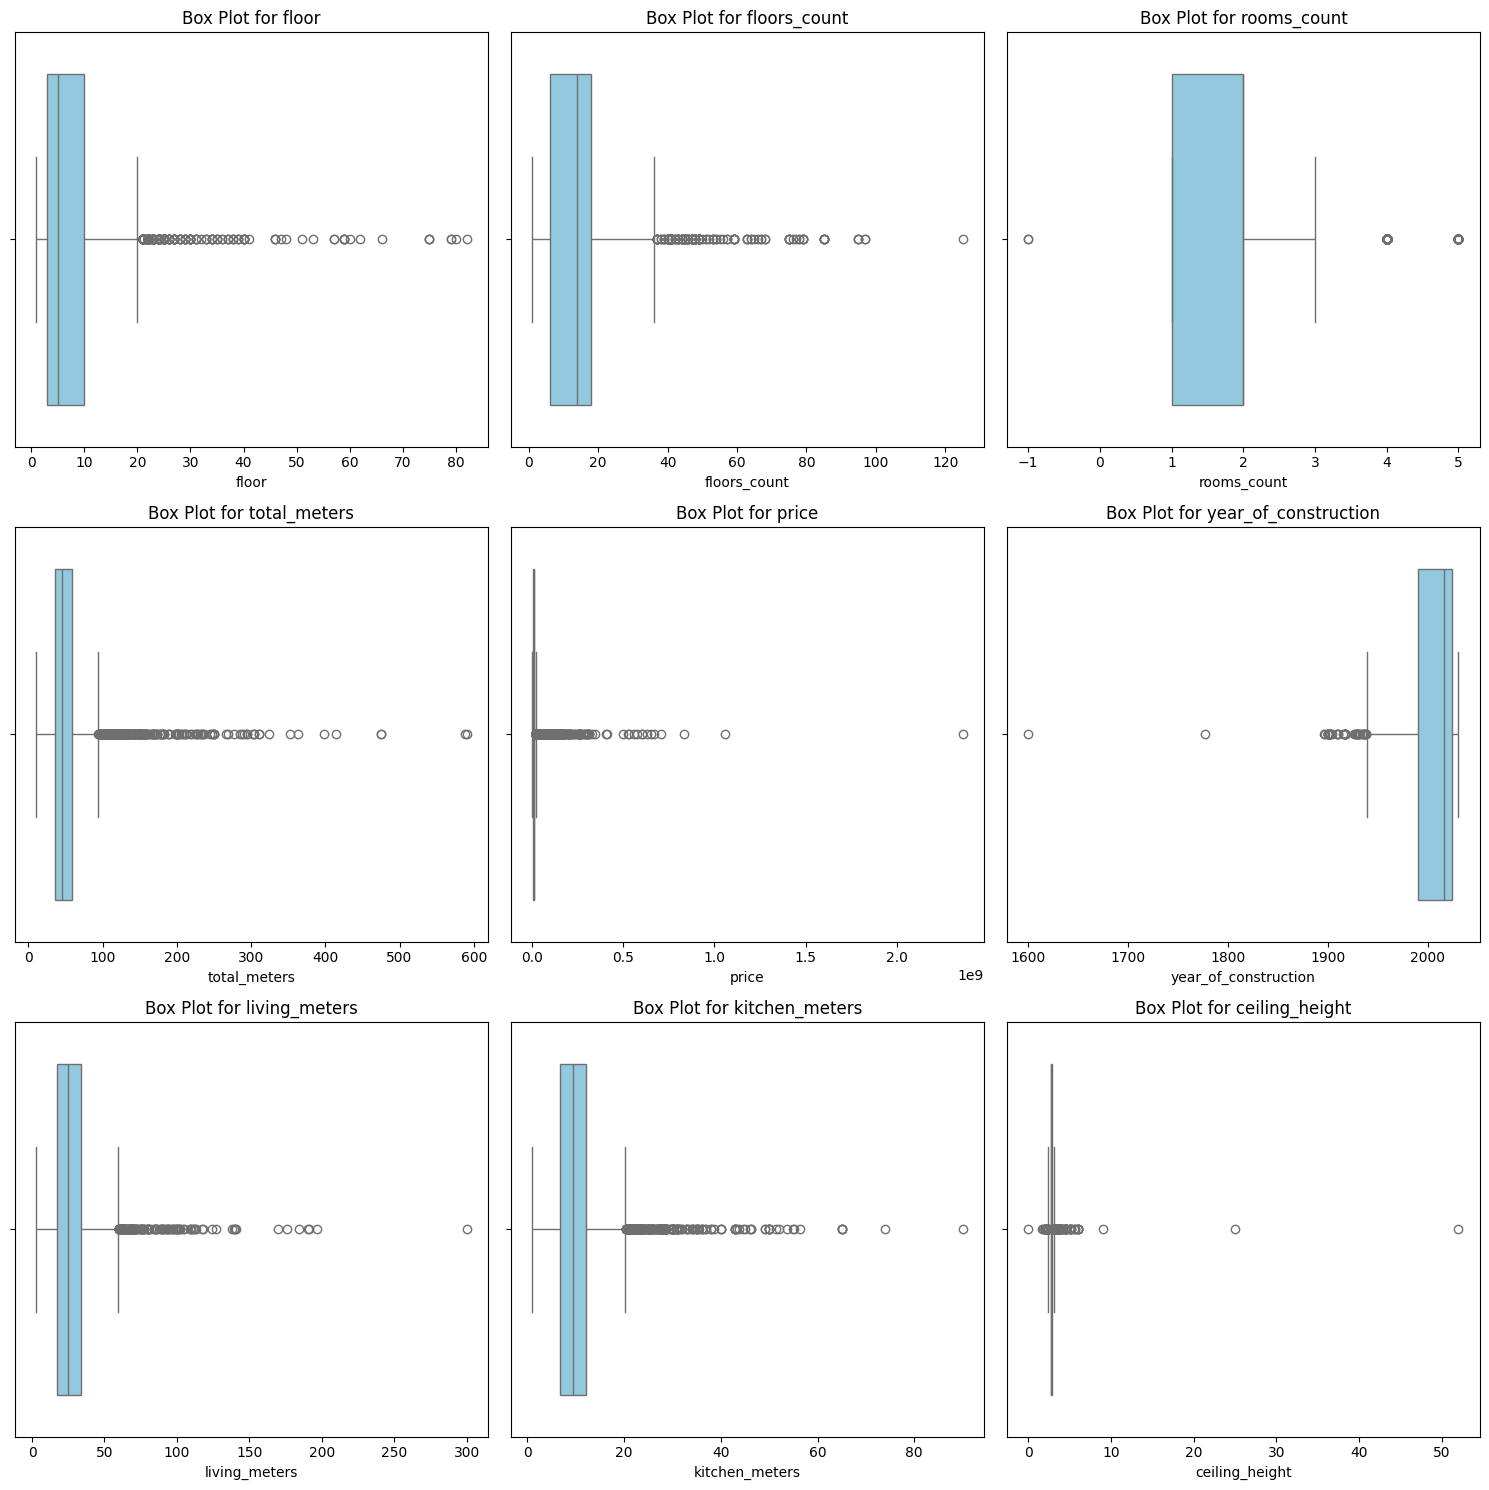

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Создание box plots для каждого столбца
for i, column in enumerate(possible_outliers.columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x=possible_outliers[column], ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f'Box Plot for {column}')


plt.subplots_adjust(hspace=0.9)
plt.tight_layout()
plt.show()

In [ ]:
possible_outliers

,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,ceiling_height
0,6.0,6.0,1.0,20.7,2350000.0,1917.0,18.0,1.0,3.0
1,1.0,9.0,1.0,33.0,4150000.0,1975.0,18.0,6.0,2.7
2,4.0,4.0,1.0,14.0,1700000.0,NaN,NaN,NaN,NaN
3,5.0,5.0,1.0,17.5,2500000.0,1968.0,NaN,NaN,NaN
4,4.0,7.0,1.0,25.9,3000000.0,2009.0,20.0,5.0,3.5
...,...,...,...,...,...,...,...,...,...
10386,23.0,24.0,1.0,38.5,9363008.0,NaN,NaN,NaN,NaN
10387,1.0,3.0,2.0,43.3,5750000.0,NaN,NaN,NaN,NaN
10388,8.0,8.0,2.0,60.0,9200000.0,NaN,NaN,NaN,NaN
10389,3.0,19.0,2.0,58.0,8200000.0,NaN,NaN,NaN,NaN


Удаляем выбросы и выводим график

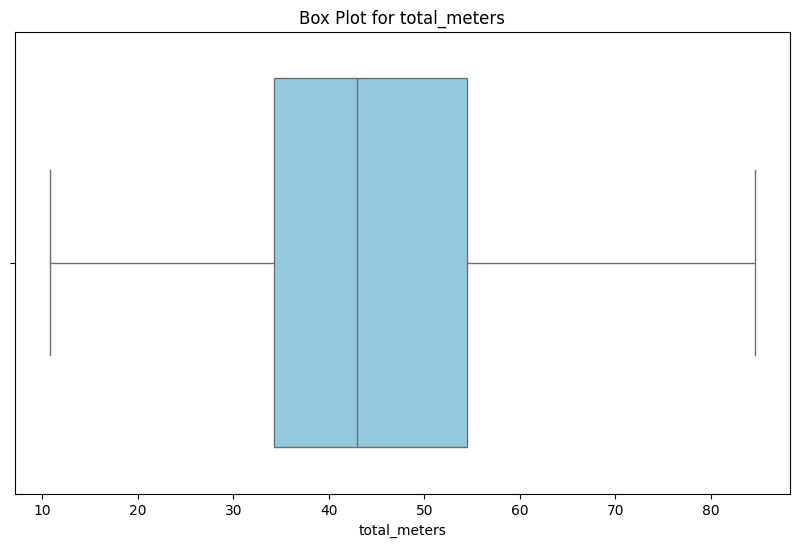

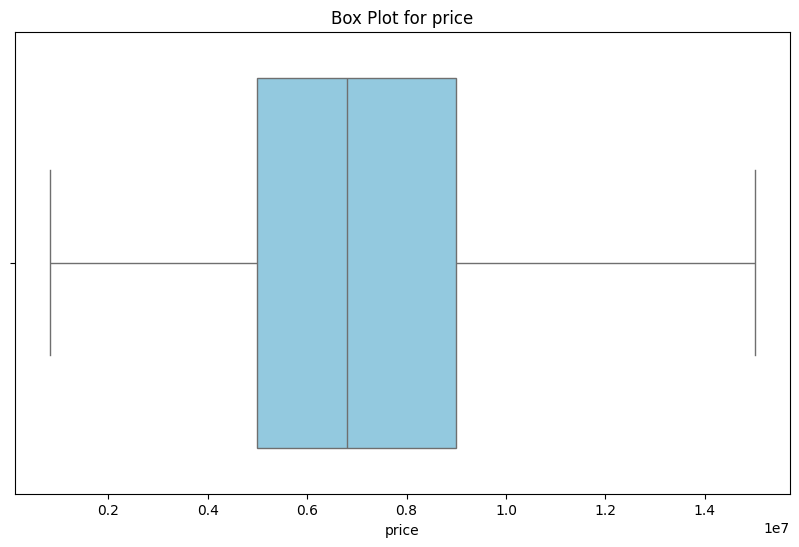

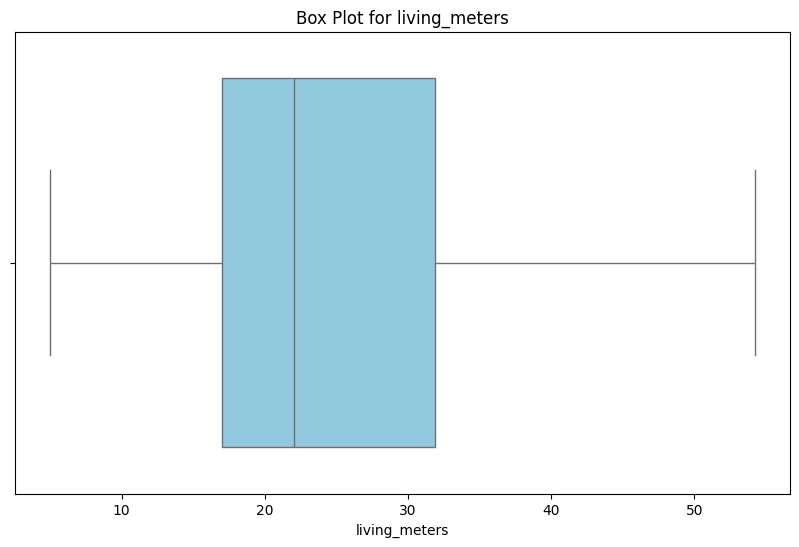

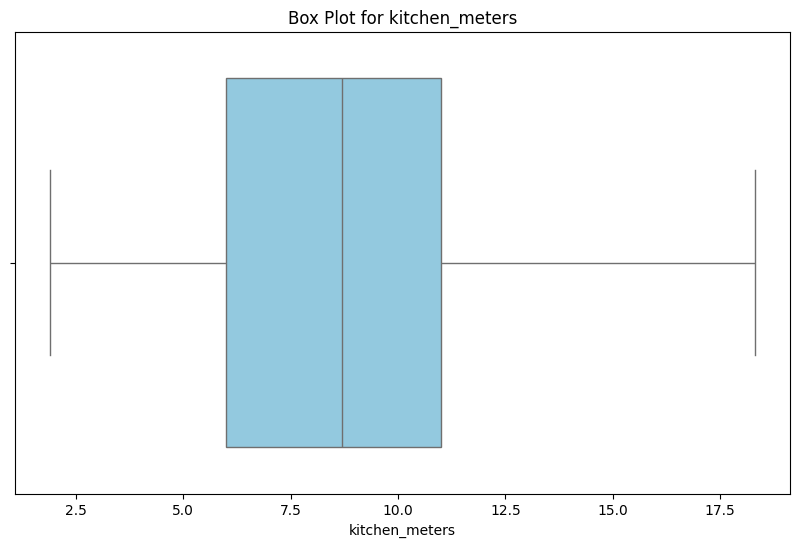

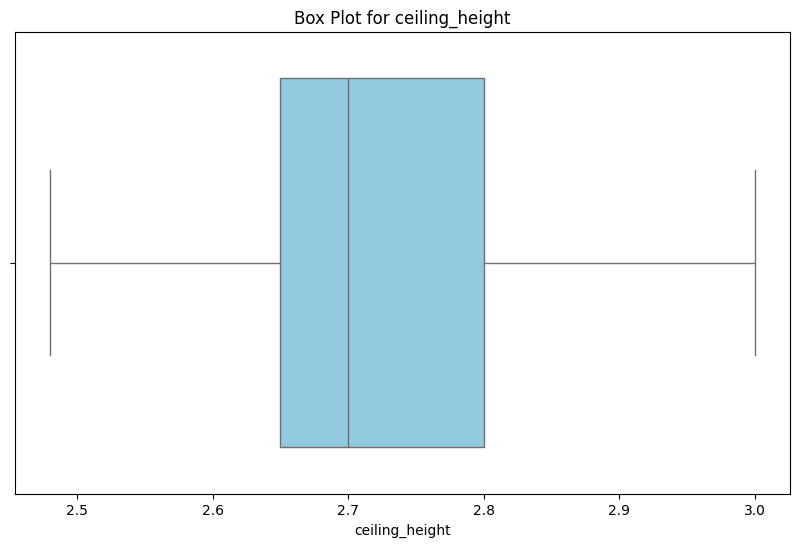

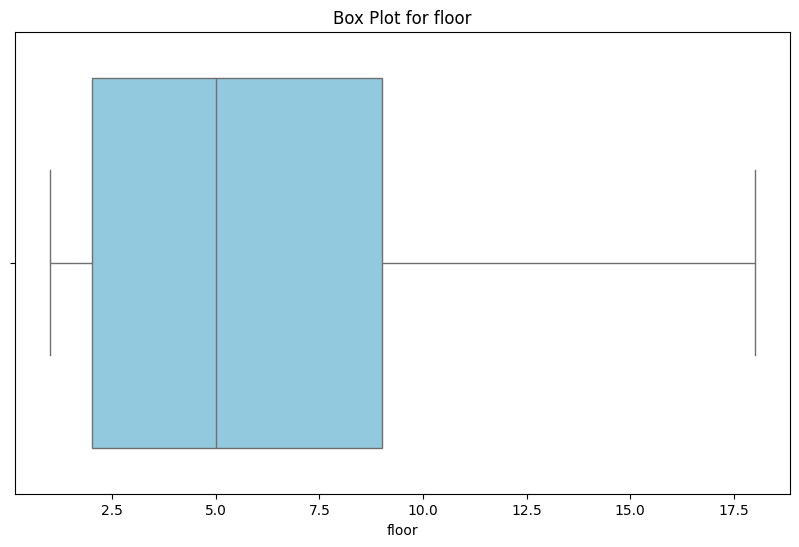

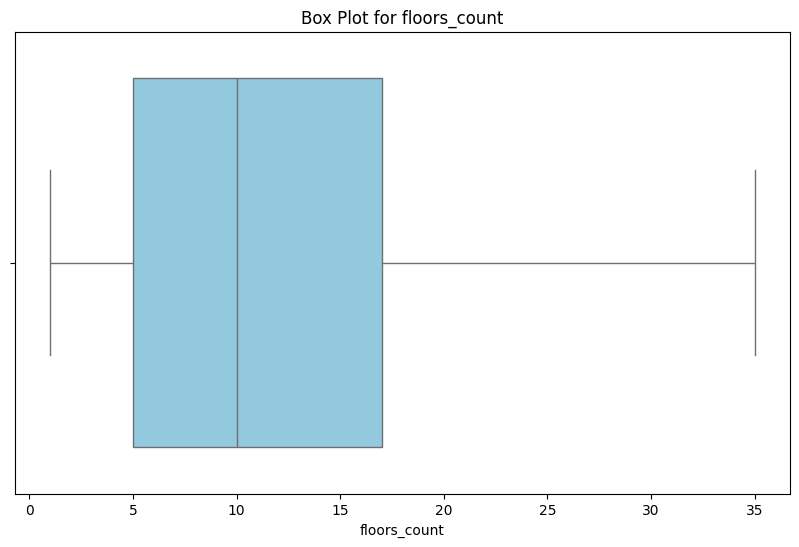

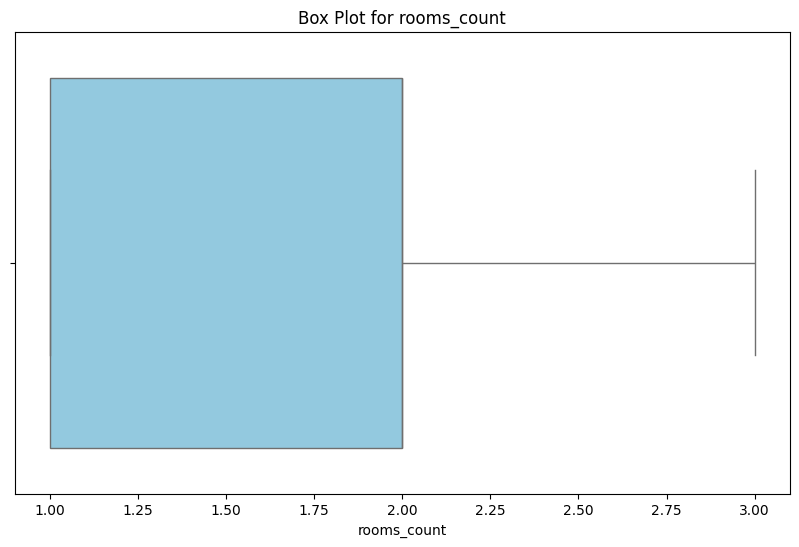

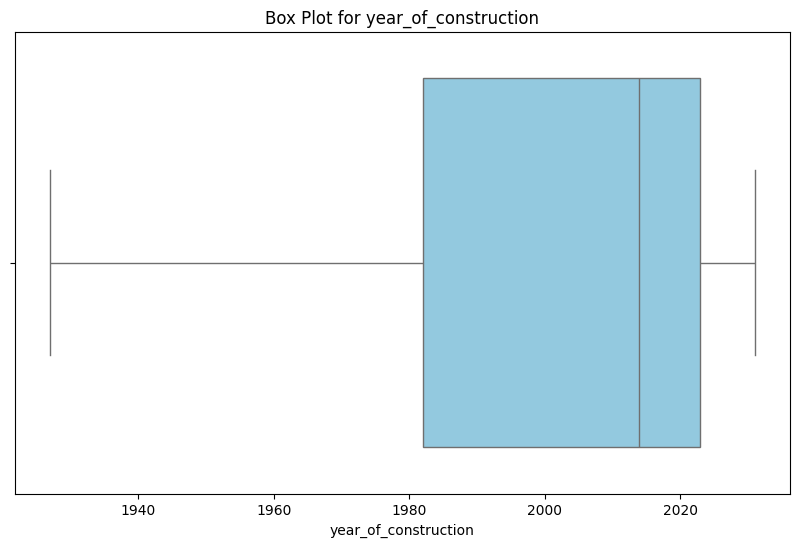

Обработанные данные:
       floor  floors_count  rooms_count  total_meters      price  \
1        1.0           9.0          1.0          33.0  4150000.0   
2        4.0           4.0          1.0          14.0  1700000.0   
3        5.0           5.0          1.0          17.5  2500000.0   
5        2.0           3.0          1.0          46.7  6599999.0   
8        1.0           2.0          1.0          27.1  1900000.0   
...      ...           ...          ...           ...        ...   
10384    7.0          16.0          1.0          38.8  6290000.0   
10385    4.0          12.0          2.0          53.6  9300000.0   
10387    1.0           3.0          2.0          43.3  5750000.0   
10388    8.0           8.0          2.0          60.0  9200000.0   
10389    3.0          19.0          2.0          58.0  8200000.0   

       year_of_construction  living_meters  kitchen_meters  ceiling_height  
1                    1975.0           18.0             6.0             2.7  
2       

In [ ]:
def detect_outliers_iqr(possible_outliers, column):
    Q1 = possible_outliers[column].quantile(0.25)
    Q3 = possible_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = possible_outliers[(possible_outliers[column] < lower_bound) | (possible_outliers[column] > upper_bound)]
    return outliers

# функцияя для удаления выбросов
def remove_outliers(possible_outliers, column):
    outliers = detect_outliers_iqr(possible_outliers, column)
    possible_outliers = possible_outliers.drop(outliers.index)
    return possible_outliers

# список количественных переменных
quantitative_columns = ['total_meters', 'price', 'living_meters', 'kitchen_meters', 'ceiling_height']

# категориальные переменные
categorical_columns = ['floor', 'floors_count', 'rooms_count', 'year_of_construction']

# Визуализация выбросов
def visualize_outliers(possible_outliers, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=possible_outliers[column], color='skyblue')
    plt.title(f'Box Plot for {column}')
    plt.show()

# Определение и удаление выбросов
for column in quantitative_columns + categorical_columns:
    possible_outliers = remove_outliers(possible_outliers, column)
    visualize_outliers(possible_outliers, column)

# Вывод обработанных данных
print("Обработанные данные:")
print(possible_outliers)

Необходимо сохранить эти изменения и добавить датасет без выбросов

In [ ]:
remaining_indices = possible_outliers.index

# Обновляем df, оставляя только строки, которые не были удалены как выбросы
df = df.loc[remaining_indices]

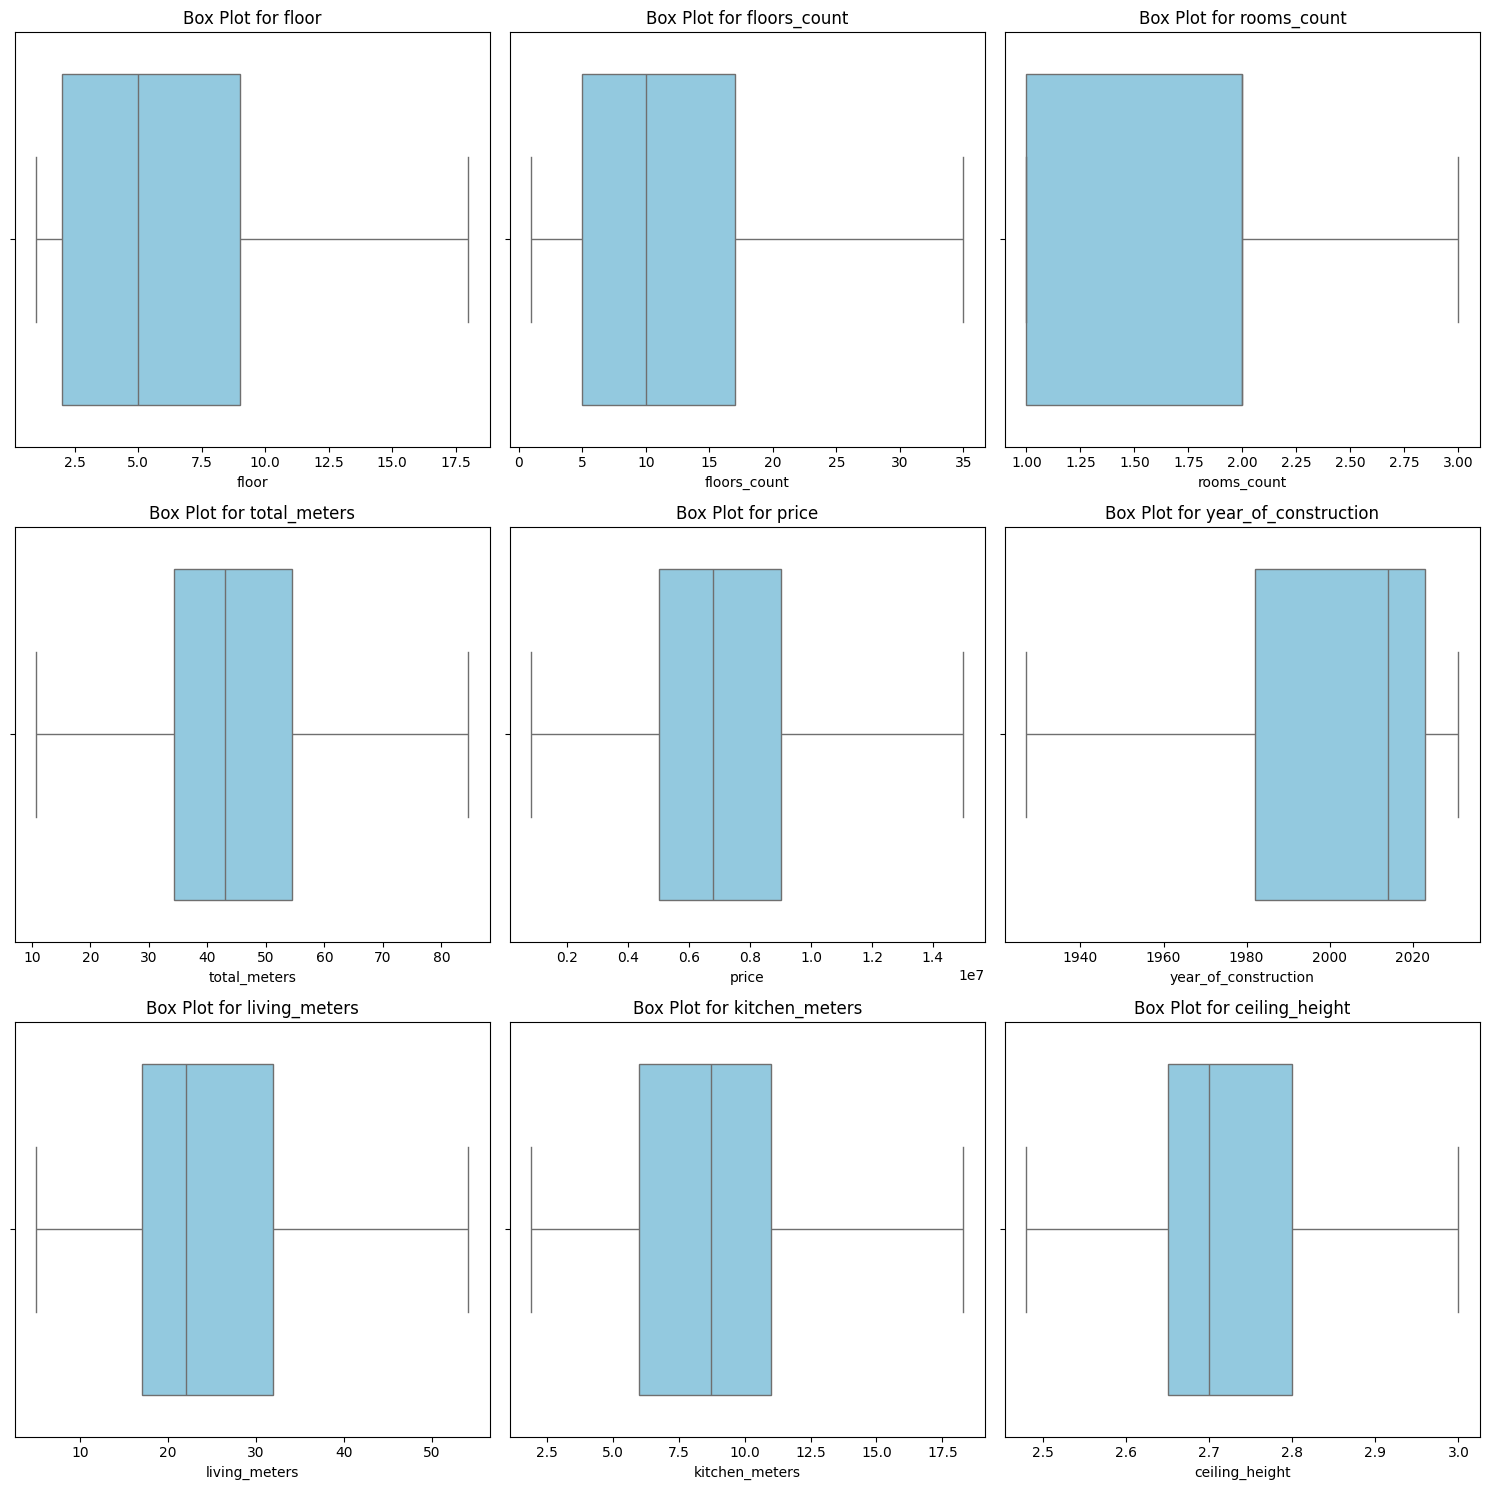

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))


for i, column in enumerate(possible_outliers.columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x=df[column], ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f'Box Plot for {column}')

# Отступы
plt.subplots_adjust(hspace=0.9)
plt.tight_layout()
plt.show()

Сравниваем датасет без выбросов и тот который я объединила

In [ ]:
df.describe()

,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,ceiling_height
count,7377.000000,7377.000000,7293.000000,7377.000000,7.375000e+03,4480.000000,4439.000000,4766.000000,3405.000000
mean,6.151552,12.227599,1.600302,44.920263,7.195146e+06,2003.316741,24.845979,9.020814,2.725439
std,4.532908,6.790509,0.655568,13.676023,2.856323e+06,23.033613,10.171753,3.247766,0.131362
min,1.000000,1.000000,1.000000,10.800000,8.300000e+05,1927.000000,5.000000,1.900000,2.480000
25%,2.000000,5.000000,1.000000,34.300000,4.999000e+06,1982.000000,17.000000,6.000000,2.650000
50%,5.000000,10.000000,2.000000,43.000000,6.800000e+06,2014.000000,22.000000,8.700000,2.700000
75%,9.000000,17.000000,2.000000,54.500000,9.000000e+06,2023.000000,31.900000,11.000000,2.800000
max,18.000000,35.000000,3.000000,84.600000,1.500000e+07,2031.000000,54.200000,18.300000,3.000000


In [ ]:
possible_outliers.describe()

,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,ceiling_height
count,7377.000000,7377.000000,7293.000000,7377.000000,7.375000e+03,4480.000000,4439.000000,4766.000000,3405.000000
mean,6.151552,12.227599,1.600302,44.920263,7.195146e+06,2003.316741,24.845979,9.020814,2.725439
std,4.532908,6.790509,0.655568,13.676023,2.856323e+06,23.033613,10.171753,3.247766,0.131362
min,1.000000,1.000000,1.000000,10.800000,8.300000e+05,1927.000000,5.000000,1.900000,2.480000
25%,2.000000,5.000000,1.000000,34.300000,4.999000e+06,1982.000000,17.000000,6.000000,2.650000
50%,5.000000,10.000000,2.000000,43.000000,6.800000e+06,2014.000000,22.000000,8.700000,2.700000
75%,9.000000,17.000000,2.000000,54.500000,9.000000e+06,2023.000000,31.900000,11.000000,2.800000
max,18.000000,35.000000,3.000000,84.600000,1.500000e+07,2031.000000,54.200000,18.300000,3.000000


Если посмотреть на эту таблицу, то можно увидеть что максимальное значение в колонке год постройке раавно 2031, что не может быть потому что сейчас 2024

In [ ]:
df.shape

(7379, 21)

Я смотрю сколько строчек у меня после этого осталось

Надо заполнить числовые данные с помощью медианы

In [ ]:
median = ['total_meters', 'living_meters', 'kitchen_meters',
          'ceiling_height', 'price']

for m in median:
  df[m] = df[m].fillna(df[m].median())

<Axes: >

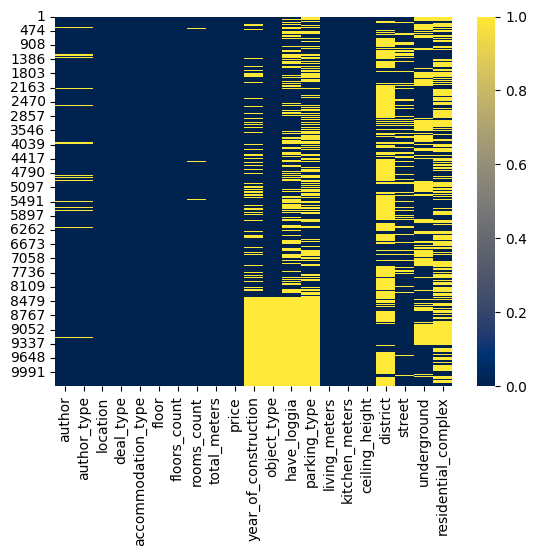

In [ ]:
sns.heatmap(df.isnull(), cmap='cividis')

Категориальные заполняем модой

In [ ]:
columns_to_fill = ['floors_count', 'rooms_count', 'floor']


for column in columns_to_fill:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

In [ ]:
median_value = df['year_of_construction'].median()
median_value = int(median_value)


df['year_of_construction'] = df['year_of_construction'].fillna(median_value)

In [ ]:
df.columns

Index(['author', 'author_type', 'location', 'deal_type', 'accommodation_type',
       'floor', 'floors_count', 'rooms_count', 'total_meters', 'price',
       'year_of_construction', 'object_type', 'have_loggia', 'parking_type',
       'living_meters', 'kitchen_meters', 'ceiling_height', 'district',
       'street', 'underground', 'residential_complex'],
      dtype='object')

<Axes: >

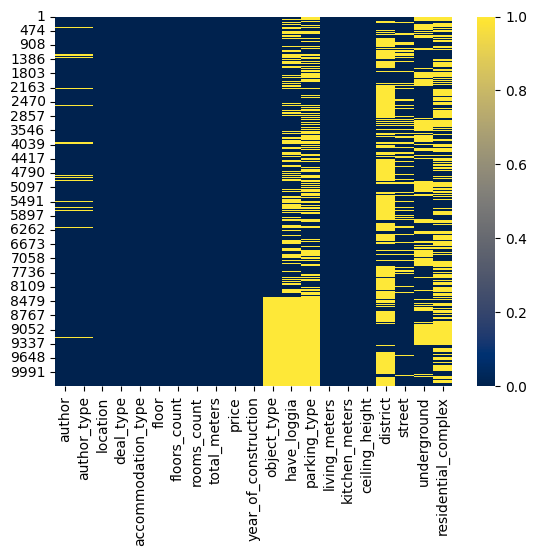

In [ ]:
sns.heatmap(df.isnull(), cmap='cividis')

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
district,4731
residential_complex,4368
parking_type,4335
have_loggia,3838
underground,2636
object_type,1784
street,1223
author,271
author_type,263
accommodation_type,1


In [ ]:
df.head()

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,...,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,Серпухов,sale,flat,1.0,9.0,1.0,33.0,4150000.0,...,Вторичка,NaN,NaN,18.0,6.0,2.7,NaN,Ворошилова,Аннино,NaN
2,ID 3246838,realtor,Серпухов,sale,flat,4.0,4.0,1.0,14.0,1700000.0,...,Вторичка,NaN,NaN,22.0,8.7,2.7,Красный Текстильщик мкр,Красный Текстильщик,NaN,NaN
3,ID 64398571,unknown,Серпухов,sale,flat,5.0,5.0,1.0,17.5,2500000.0,...,Вторичка,NaN,NaN,22.0,8.7,2.7,Серпухов,Российская,NaN,NaN
5,Максим Юсов,real_estate_agent,Серпухов,sale,flat,2.0,3.0,1.0,46.7,6599999.0,...,Вторичка,NaN,NaN,25.0,6.0,2.7,Серпухов,2-я Московская,NaN,NaN
8,Ольга Протченко,realtor,Серпухов,sale,flat,1.0,2.0,1.0,27.1,1900000.0,...,Вторичка,NaN,Наземная,18.0,6.0,2.5,NaN,NaN,NaN,NaN


Осталось только заполнить все другие категориальные колонки

In [ ]:
cat_columns = ['object_type', 'have_loggia', 'parking_type', 'district',
       'street', 'underground', 'residential_complex', 'author',
               'author_type',	'accommodation_type',	'deal_type', 'location']


for column in cat_columns:
     df[column] = df[column].apply(lambda x: 'unknown' if pd.isna(x) else x)

<Axes: >

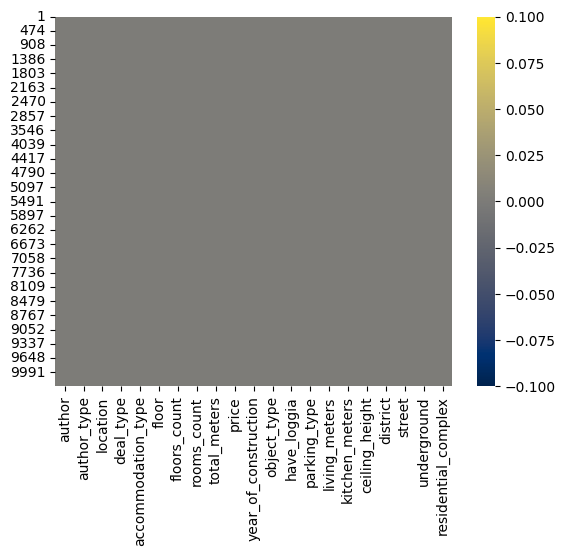

In [ ]:
sns.heatmap(df.isnull(), cmap='cividis')

In [ ]:
df.head(5)

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,...,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,Серпухов,sale,flat,1.0,9.0,1.0,33.0,4150000.0,...,Вторичка,unknown,unknown,18.0,6.0,2.7,unknown,Ворошилова,Аннино,unknown
2,ID 3246838,realtor,Серпухов,sale,flat,4.0,4.0,1.0,14.0,1700000.0,...,Вторичка,unknown,unknown,22.0,8.7,2.7,Красный Текстильщик мкр,Красный Текстильщик,unknown,unknown
3,ID 64398571,unknown,Серпухов,sale,flat,5.0,5.0,1.0,17.5,2500000.0,...,Вторичка,unknown,unknown,22.0,8.7,2.7,Серпухов,Российская,unknown,unknown
5,Максим Юсов,real_estate_agent,Серпухов,sale,flat,2.0,3.0,1.0,46.7,6599999.0,...,Вторичка,unknown,unknown,25.0,6.0,2.7,Серпухов,2-я Московская,unknown,unknown
8,Ольга Протченко,realtor,Серпухов,sale,flat,1.0,2.0,1.0,27.1,1900000.0,...,Вторичка,unknown,Наземная,18.0,6.0,2.5,unknown,unknown,unknown,unknown


Теперь с уверенностью можно сказать что в датасете нет пропусков

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
author,0
object_type,0
underground,0
street,0
district,0
ceiling_height,0
kitchen_meters,0
living_meters,0
parking_type,0
have_loggia,0


In [ ]:
df.columns

Index(['author', 'author_type', 'location', 'deal_type', 'accommodation_type',
       'floor', 'floors_count', 'rooms_count', 'total_meters', 'price',
       'year_of_construction', 'object_type', 'have_loggia', 'parking_type',
       'living_meters', 'kitchen_meters', 'ceiling_height', 'district',
       'street', 'underground', 'residential_complex'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7379 entries, 1 to 10389
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                7379 non-null   object 
 1   author_type           7379 non-null   object 
 2   location              7379 non-null   object 
 3   deal_type             7379 non-null   object 
 4   accommodation_type    7379 non-null   object 
 5   floor                 7379 non-null   float64
 6   floors_count          7379 non-null   float64
 7   rooms_count           7379 non-null   float64
 8   total_meters          7379 non-null   float64
 9   price                 7379 non-null   float64
 10  year_of_construction  7379 non-null   float64
 11  object_type           7379 non-null   object 
 12  have_loggia           7379 non-null   object 
 13  parking_type          7379 non-null   object 
 14  living_meters         7379 non-null   float64
 15  kitchen_meters        737

Теперь можно привести некоторые колонки из float в int так как это должно быть целое число

In [ ]:
to_int_columns = ['floor', 'floors_count', 'rooms_count', 'year_of_construction']  #


for columni in to_int_columns:
  df[columni] = df[columni].astype(int)

In [ ]:
df.dtypes

,0
author,object
author_type,object
location,object
deal_type,object
accommodation_type,object
floor,int64
floors_count,int64
rooms_count,int64
total_meters,float64
price,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7379 entries, 1 to 10389
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                7379 non-null   object 
 1   author_type           7379 non-null   object 
 2   location              7379 non-null   object 
 3   deal_type             7379 non-null   object 
 4   accommodation_type    7379 non-null   object 
 5   floor                 7379 non-null   int64  
 6   floors_count          7379 non-null   int64  
 7   rooms_count           7379 non-null   int64  
 8   total_meters          7379 non-null   float64
 9   price                 7379 non-null   float64
 10  year_of_construction  7379 non-null   int64  
 11  object_type           7379 non-null   object 
 12  have_loggia           7379 non-null   object 
 13  parking_type          7379 non-null   object 
 14  living_meters         7379 non-null   float64
 15  kitchen_meters        737

После того как были убраны выбросы и данные были приведены к нужному формату, можно посчитать цену за квадратный метр

In [ ]:
df['square_price'] = df['price']/df['total_meters']
df.head()

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,...,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex,square_price
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,Серпухов,sale,flat,1,9,1,33.0,4150000.0,...,unknown,unknown,18.0,6.0,2.7,unknown,Ворошилова,Аннино,unknown,125757.575758
2,ID 3246838,realtor,Серпухов,sale,flat,4,4,1,14.0,1700000.0,...,unknown,unknown,22.0,8.7,2.7,Красный Текстильщик мкр,Красный Текстильщик,unknown,unknown,121428.571429
3,ID 64398571,unknown,Серпухов,sale,flat,5,5,1,17.5,2500000.0,...,unknown,unknown,22.0,8.7,2.7,Серпухов,Российская,unknown,unknown,142857.142857
5,Максим Юсов,real_estate_agent,Серпухов,sale,flat,2,3,1,46.7,6599999.0,...,unknown,unknown,25.0,6.0,2.7,Серпухов,2-я Московская,unknown,unknown,141327.601713
8,Ольга Протченко,realtor,Серпухов,sale,flat,1,2,1,27.1,1900000.0,...,unknown,Наземная,18.0,6.0,2.5,unknown,unknown,unknown,unknown,70110.701107


In [ ]:
df.columns

Index(['author', 'author_type', 'location', 'deal_type', 'accommodation_type',
       'floor', 'floors_count', 'rooms_count', 'total_meters', 'price',
       'year_of_construction', 'object_type', 'have_loggia', 'parking_type',
       'living_meters', 'kitchen_meters', 'ceiling_height', 'district',
       'street', 'underground', 'residential_complex', 'square_price'],
      dtype='object')

# Визуализация

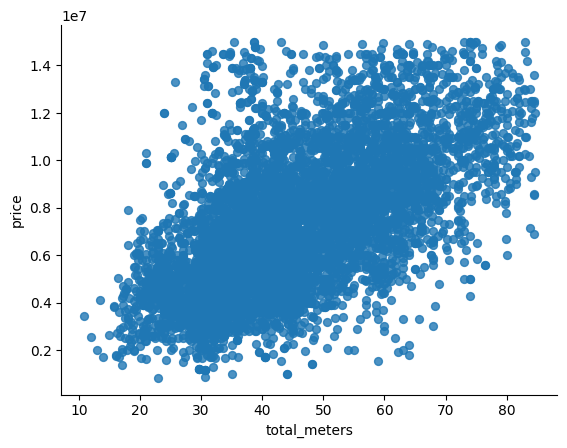

In [ ]:
# @title total_meters vs price

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='total_meters', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
ot = df.groupby('object_type')['square_price'].mean().reset_index()
ot = ot[~ot['object_type'].isin(['object_type', 'unknown'])]
ot

,object_type,square_price
2,Вторичка,155541.787758
3,Вторичка / Апартаменты,201483.826520
4,Вторичка / Пентхаус,153768.844221
5,Новостройка,194835.470250
6,Новостройка / Апартаменты,210619.236641


Здесь можно заметить, что дороже всего Новостройка / Апартаменты, а Вторички стоят дешевле всего

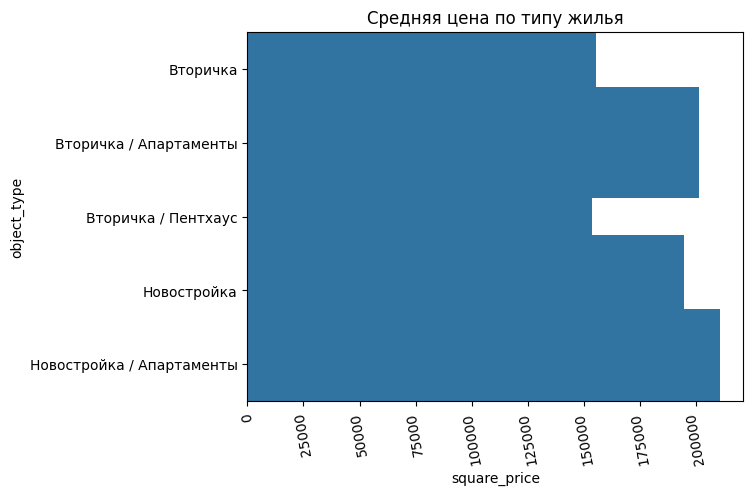

In [ ]:
sns.barplot(x='square_price', y='object_type', data=ot, width=1.5)  # Увеличиваем ширину столбцов до 120%
plt.title('Средняя цена по типу жилья')
plt.xticks(rotation=100)  # Поворот подписей по оси X для лучшей читаемости
plt.show()

Выбираем промежуток от 1990 до 2024

In [ ]:
df = df[(df["year_of_construction"] >= 1990) & (df["year_of_construction"] <= 2024)]

In [ ]:
average_prices = df.groupby('year_of_construction')['square_price'].mean().reset_index()
average_prices

,year_of_construction,square_price
0,1990,126335.324815
1,1991,151349.609982
2,1992,152699.146919
3,1993,160159.332010
4,1994,167122.258049
5,1995,153128.270043
6,1996,152052.435221
7,1997,155666.947348
8,1998,179691.793690
9,1999,175003.573941


Это график который показывает сколько и в какой год стоил 1 квадратный метр

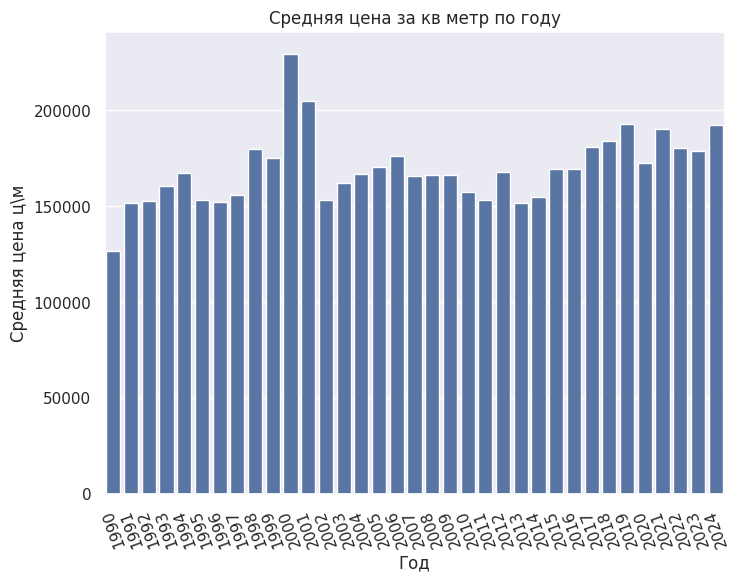

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='year_of_construction', y='square_price', data=average_prices)
plt.title('Средняя цена за кв метр по году')
plt.xlabel('Год')
plt.ylabel('Средняя цена ц\м')
plt.xticks(rotation=110)

plt.show()

In [ ]:
df['year_of_construction'].sort_values(ascending=False)

,year_of_construction
1821,2024
2951,2024
3131,2024
8228,2024
4968,2024
...,...
1226,1990
7449,1990
6598,1990
7588,1990


Максимальная и Минимальная цена

Минимальная цена: 126335.32481538893 в: 1990
Максимальная цена: 229439.23484830378 в: 2000


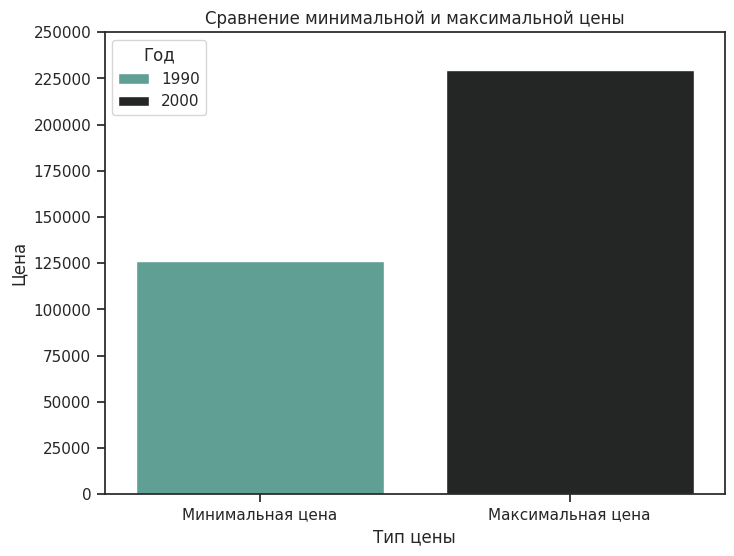

In [ ]:
min_year = average_prices.loc[average_prices['square_price'].idxmin(), 'year_of_construction']
max_year = average_prices.loc[average_prices['square_price'].idxmax(), 'year_of_construction']

min_price = average_prices['square_price'].min()
max_price = average_prices['square_price'].max()

print(f"Минимальная цена: {min_price} в: {min_year}")
print(f"Максимальная цена: {max_price} в: {max_year}")


plot_data = pd.DataFrame({
    'Год': [min_year, max_year],
    'Цена': [min_price, max_price],
    'Тип': ['Минимальная цена', 'Максимальная цена']
})


plt.figure(figsize=(8, 6))
sns.barplot(x='Тип', y='Цена', hue='Год', data=plot_data, palette="dark:#5A9_r")
plt.title('Сравнение минимальной и максимальной цены')
plt.xlabel('Тип цены')
plt.ylabel('Цена')
plt.legend(title='Год')

yticks = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000]
plt.yticks(yticks)

plt.show()

In [ ]:
df.head()

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,...,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex,square_price
2,ID 3246838,realtor,Серпухов,sale,flat,4,4,1,14.0,1700000.0,...,unknown,unknown,22.0,8.7,2.7,Красный Текстильщик мкр,Красный Текстильщик,unknown,unknown,121428.571429
5,Максим Юсов,real_estate_agent,Серпухов,sale,flat,2,3,1,46.7,6599999.0,...,unknown,unknown,25.0,6.0,2.7,Серпухов,2-я Московская,unknown,unknown,141327.601713
10,Людмила Горбачева,realtor,Серпухов,sale,flat,1,5,2,42.8,2999000.0,...,1 балкон,Наземная,24.9,6.0,2.5,пос. Чехов-8,Южная,unknown,unknown,70070.093458
13,Монолит Столица,real_estate_agent,Серпухов,sale,flat,1,3,1,25.3,2500000.0,...,1 лоджия,unknown,14.1,6.2,2.8,д. Ворщиково,Солнечный Град,unknown,unknown,98814.229249
14,Евгений Цопин,realtor,Серпухов,sale,flat,2,3,1,36.0,2790000.0,...,unknown,unknown,22.0,8.7,2.7,Чехов,Русская,unknown,unknown,77500.000000


In [ ]:
parking = df.groupby('parking_type')['square_price'].mean().reset_index()
parking

,parking_type,square_price
0,parking_type,158139.534884
1,unknown,159549.141945
2,Многоуровневая,196385.711394
3,Наземная,163017.729783
4,Открытая,185365.833664
5,Подземная,205654.274124


In [ ]:
parking = parking[~parking['parking_type'].isin(['parking_type', 'unknown'])]

In [ ]:
parking

,parking_type,square_price
2,Многоуровневая,196385.711394
3,Наземная,163017.729783
4,Открытая,185365.833664
5,Подземная,205654.274124


По этому графику можно увидеть, что дороже всего подземная парковка

<ipython-input-98-f563f7ac96b1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=parking, x='square_price', y='parking_type', palette='Dark2', estimator=np.mean)


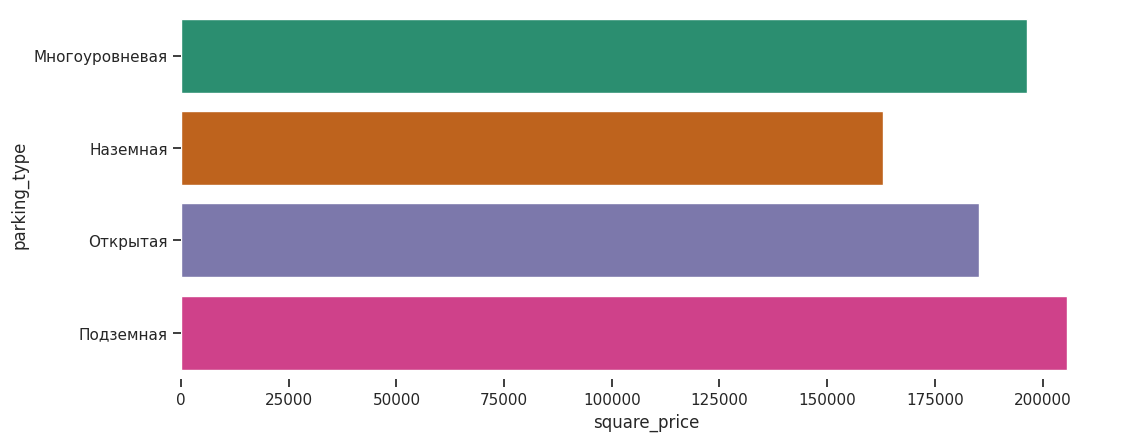

In [ ]:
figsize = (12, 1.2 * len(parking['parking_type'].unique()))
plt.figure(figsize=figsize)


sns.barplot(data=parking, x='square_price', y='parking_type', palette='Dark2', estimator=np.mean)

# Удаление лишних осей
sns.despine(top=True, right=True, bottom=True, left=True)


plt.show()

In [ ]:
logia = df.groupby('have_loggia')['square_price'].mean().reset_index()
logia

,have_loggia,square_price
0,1 балкон,153688.817578
1,1 лоджия,164433.048738
2,"1 лоджия, 1 балкон",163341.685507
3,"1 лоджия, 2 балкона",141997.292118
4,2 балкона,149157.241034
5,2 лоджии,149289.112337
6,"2 лоджии, 1 балкон",123940.897645
7,"2 лоджии, 2 балкона",181657.848325
8,3 балкона,137926.662854
9,3 лоджии,153455.314667


In [ ]:
logia = logia[~logia['have_loggia'].isin(['have_loggia', 'unknown'])]

In [ ]:
logia

,have_loggia,square_price
0,1 балкон,153688.817578
1,1 лоджия,164433.048738
2,"1 лоджия, 1 балкон",163341.685507
3,"1 лоджия, 2 балкона",141997.292118
4,2 балкона,149157.241034
5,2 лоджии,149289.112337
6,"2 лоджии, 1 балкон",123940.897645
7,"2 лоджии, 2 балкона",181657.848325
8,3 балкона,137926.662854
9,3 лоджии,153455.314667


Как влияет на цену за кв.м наличие балконов или лоджии

<ipython-input-102-f05a8f42de64>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=logia, x='square_price', y='have_loggia', palette='Dark2', estimator=np.mean)


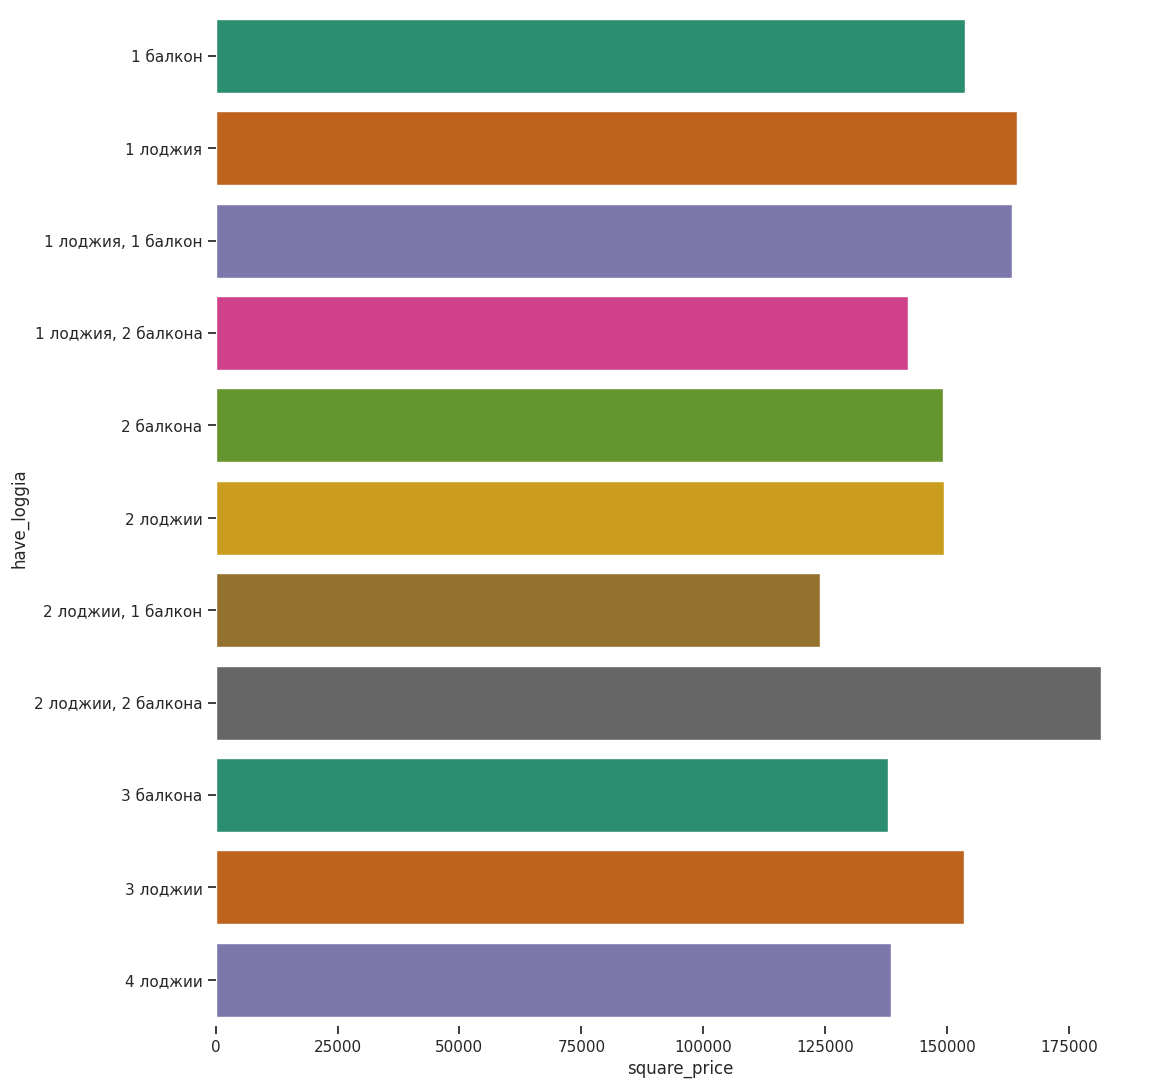

In [ ]:
figsize = (12, 1.2 * len(logia['have_loggia'].unique()))
plt.figure(figsize=figsize)


sns.barplot(data=logia, x='square_price', y='have_loggia', palette='Dark2', estimator=np.mean)


sns.despine(top=True, right=True, bottom=True, left=True)


plt.show()

In [ ]:
locations = df.groupby('location')['square_price'].mean().reset_index()
locations

,location,square_price
0,location,158139.534884
1,unknown,158139.534884
2,Балашиха,166900.760215
3,Бекасово,141942.774742
4,Видное,177705.500081
5,Волоколамск,113492.899847
6,Воскресенск,98497.887312
7,Дзержинский,166812.704505
8,Дмитров,123096.164146
9,Долгопрудный,197035.018496


In [ ]:
locations = locations[~locations['location'].isin(['location', 'unknown'])]

Цена за 1 квадратный метр в зависимости от города

<ipython-input-106-71c7de05a253>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=locations, x='square_price', y='location', palette='Dark2', estimator=np.mean)


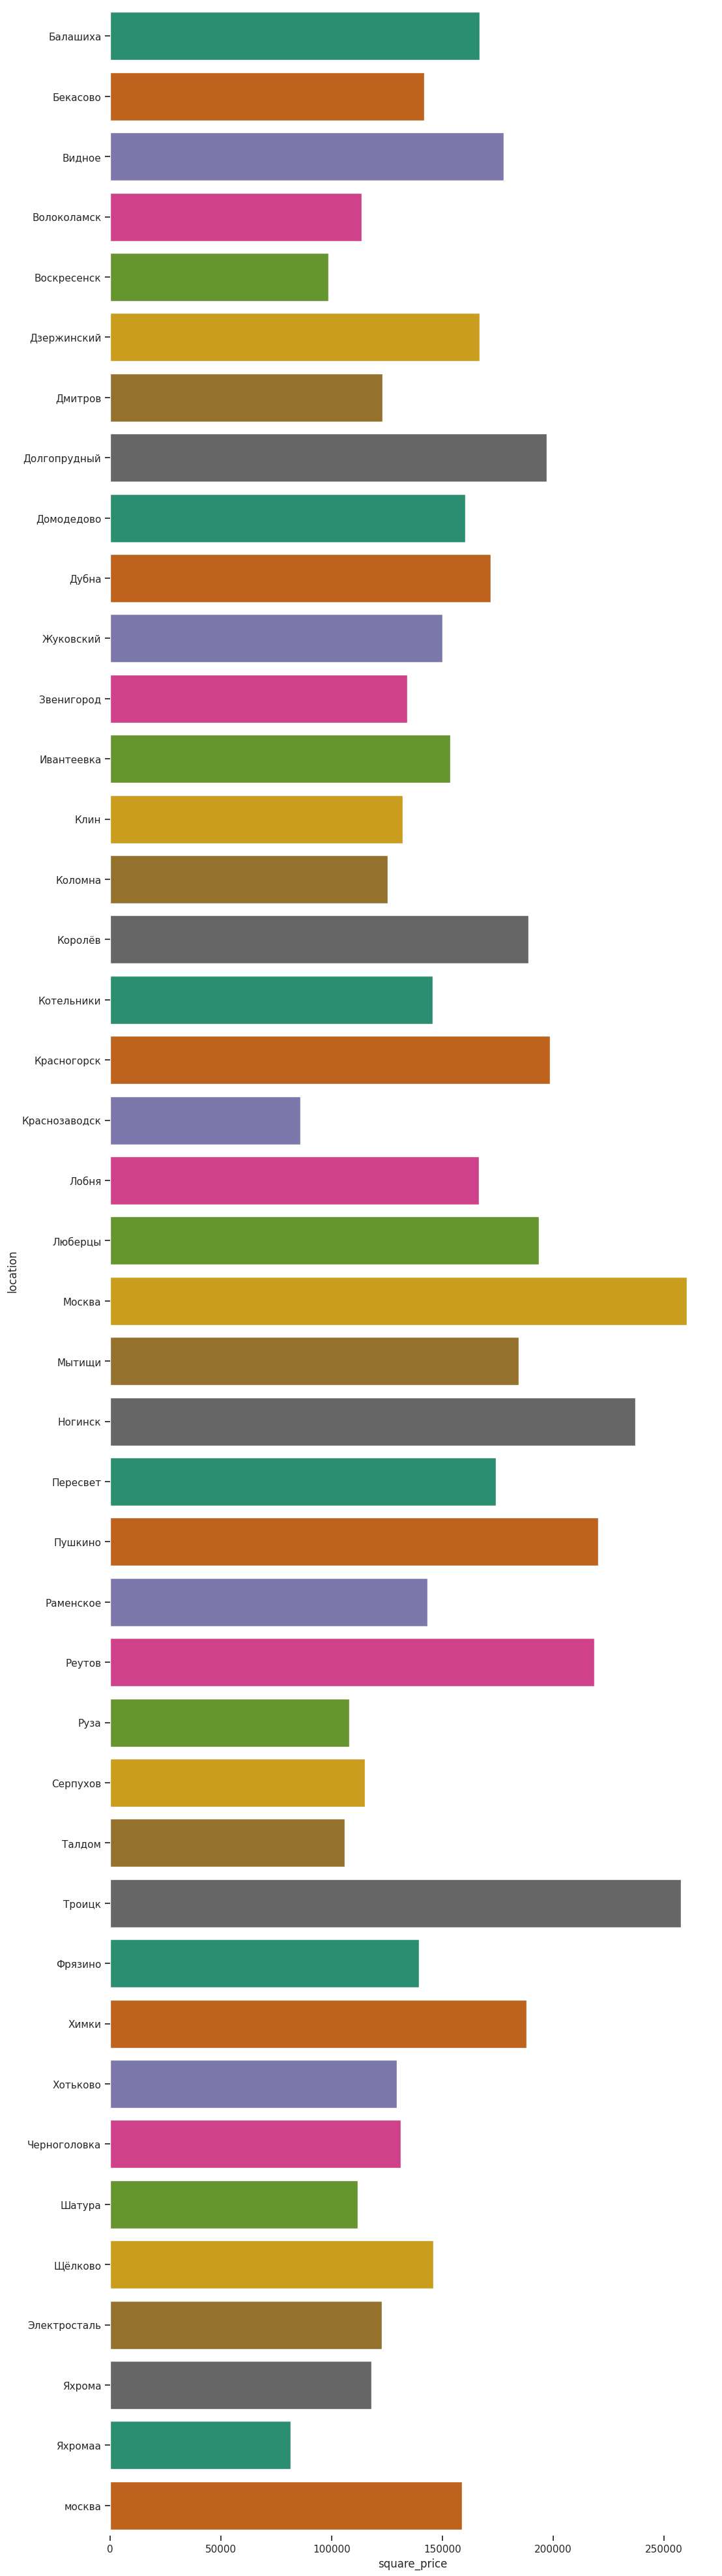

In [ ]:
figsize = (12, 1.2 * len(locations['location'].unique()))
plt.figure(figsize=figsize)


sns.barplot(data=locations, x='square_price', y='location', palette='Dark2', estimator=np.mean)


sns.despine(top=True, right=True, bottom=True, left=True)


plt.show()

**Топ 10 городов по стоимости**




<ipython-input-108-ed9461c10eb1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_locations, x='square_price', y='location', palette='Dark2', estimator=np.mean)


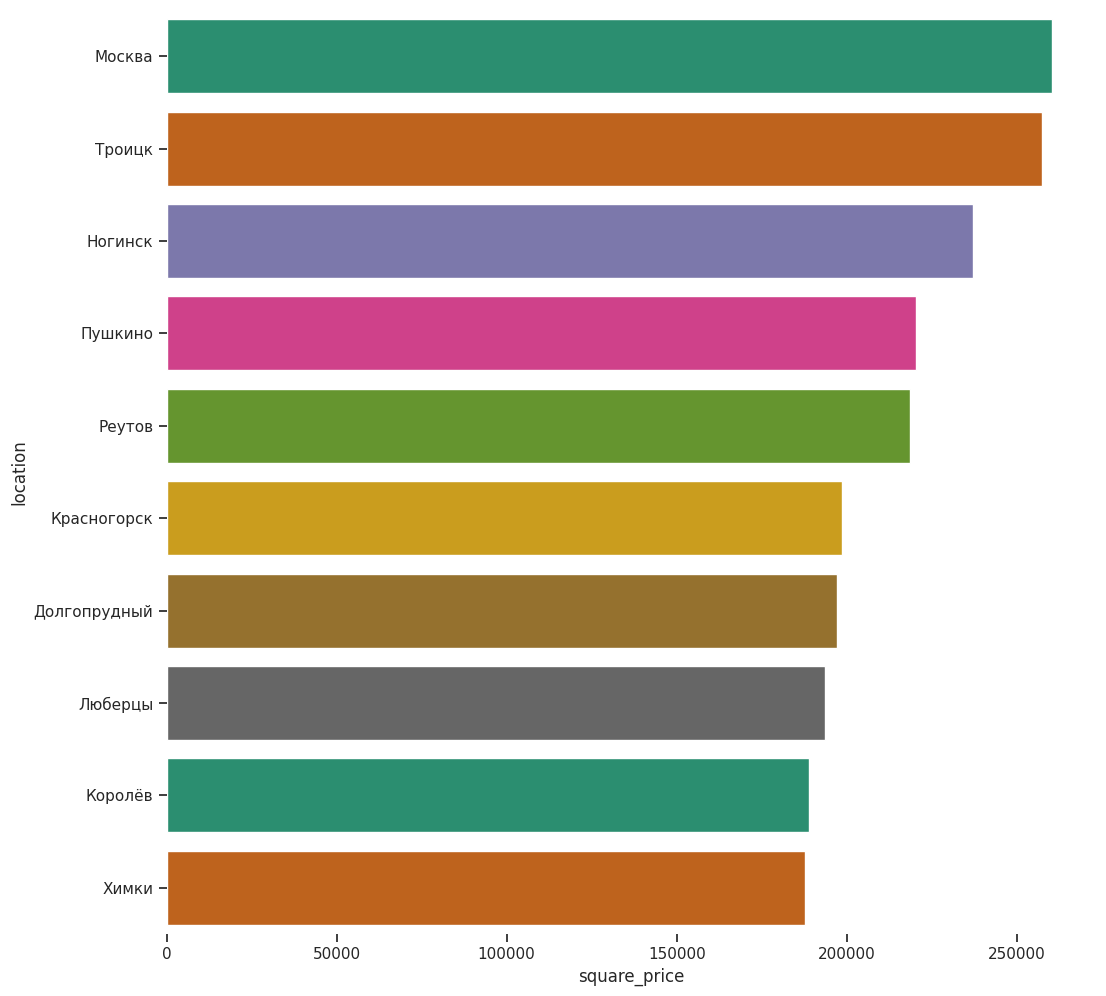

In [ ]:

top_10_locations = locations.sort_values(by='square_price', ascending=False).head(10)


figsize = (12, 1.2 * len(top_10_locations))
plt.figure(figsize=figsize)

# топ 10 городов
sns.barplot(data=top_10_locations, x='square_price', y='location', palette='Dark2', estimator=np.mean)

sns.despine(top=True, right=True, bottom=True, left=True)



# Зависимости

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df[categorical_columns])
df[categorical_columns] = encoded_data.astype(int)
df

,author,author_type,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,...,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex,square_price
2,701,5,31,1,1,4,4,1,14.0,1700000.0,...,12,1,22.0,8.7,2.7,78,227,1,38,121428.571429
5,1883,4,31,1,1,2,3,1,46.7,6599999.0,...,12,1,25.0,6.0,2.7,149,6,1,38,141327.601713
10,1839,5,31,1,1,1,5,2,42.8,2999000.0,...,0,3,24.9,6.0,2.5,286,467,1,38,70070.093458
13,1955,4,31,1,1,1,3,1,25.3,2500000.0,...,1,1,14.1,6.2,2.8,197,398,1,38,98814.229249
14,1581,5,31,1,1,2,3,1,36.0,2790000.0,...,12,1,22.0,8.7,2.7,179,843,1,38,77500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10384,1943,5,4,1,1,7,16,1,38.8,6290000.0,...,12,1,22.0,8.7,2.7,2,1076,149,38,162113.402062
10385,1985,5,4,1,1,4,12,2,53.6,9300000.0,...,12,1,22.0,8.7,2.7,2,687,149,38,173507.462687
10387,2264,5,4,1,1,1,3,2,43.3,5750000.0,...,12,1,22.0,8.7,2.7,2,792,149,38,132794.457275
10388,22,4,4,1,1,8,8,2,60.0,9200000.0,...,12,1,22.0,8.7,2.7,2,561,20,84,153333.333333


<Axes: >

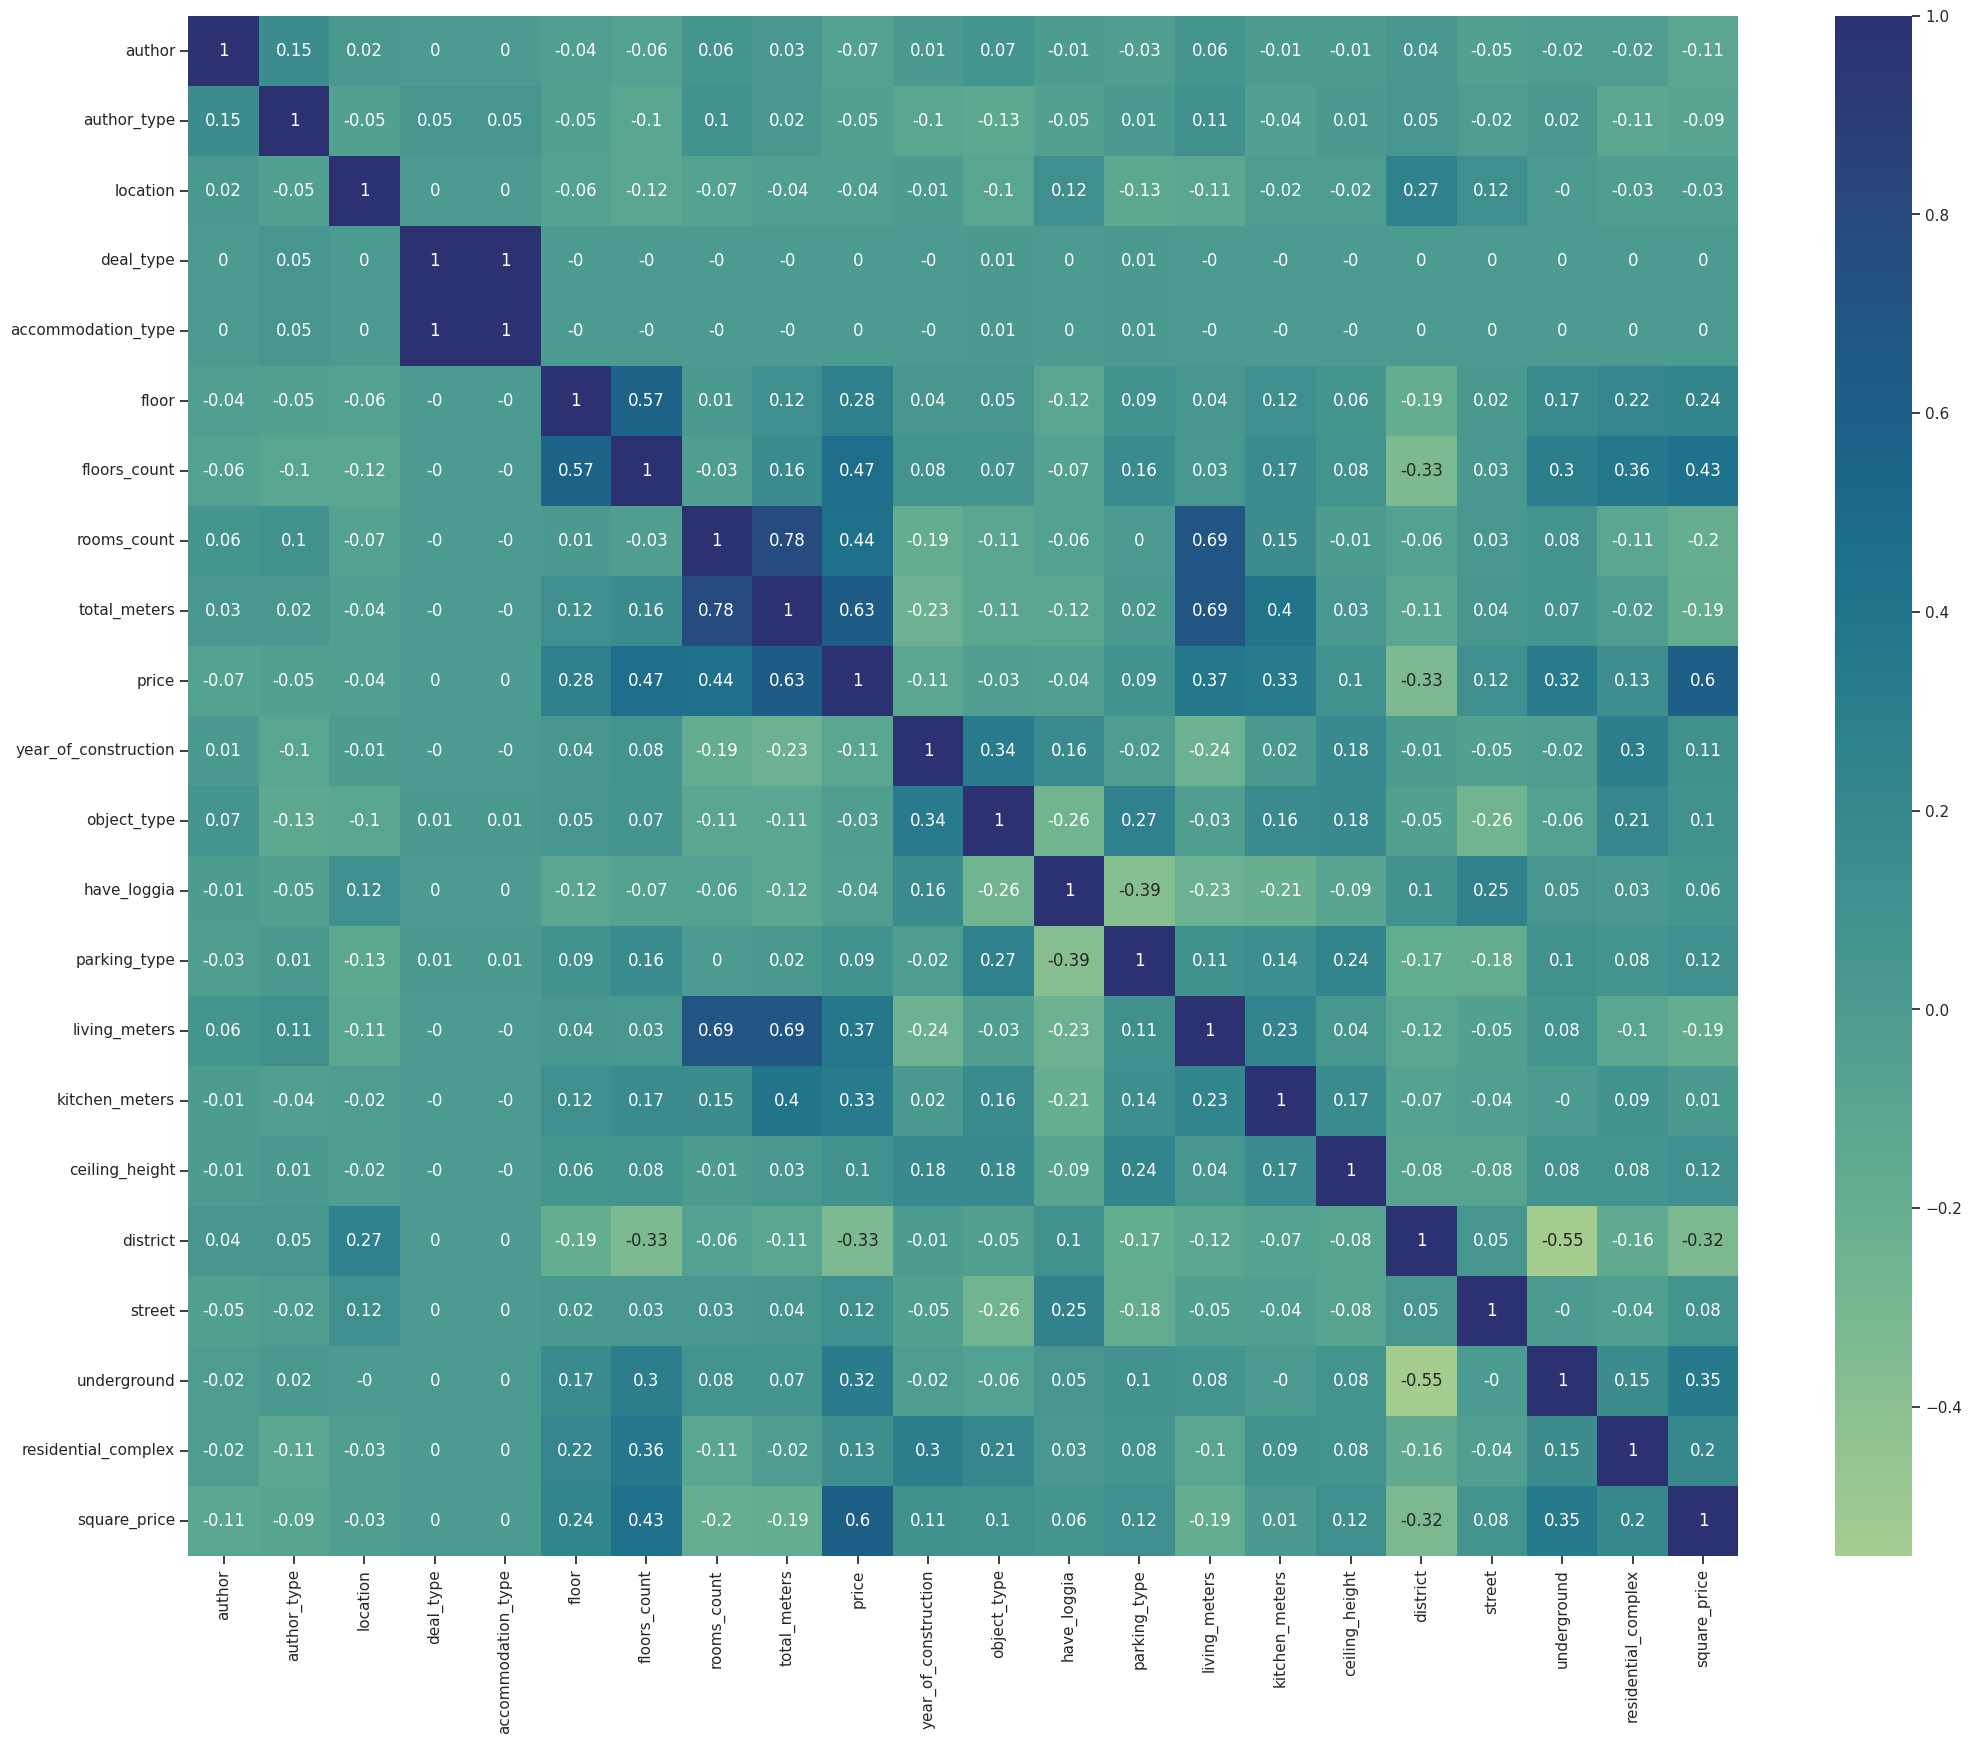

In [ ]:
plt.figure(figsize = (25,20))
sns.heatmap(df.corr().round(2), cmap="crest", annot=True)

Данные корреляции в столбик:

In [ ]:
corr_matrix = df.corr()['square_price'].round(2)
sort = corr_matrix.sort_values(ascending=False)
print(sort)

square_price            1.00
price                   0.60
floors_count            0.43
underground             0.35
floor                   0.24
residential_complex     0.20
ceiling_height          0.12
parking_type            0.12
year_of_construction    0.11
object_type             0.10
street                  0.08
have_loggia             0.06
kitchen_meters          0.01
accommodation_type      0.00
deal_type               0.00
location               -0.03
author_type            -0.09
author                 -0.11
total_meters           -0.19
living_meters          -0.19
rooms_count            -0.20
district               -0.32
Name: square_price, dtype: float64


Больше всего вляет на square_price total_meters

Также положительную корреляцию имеют такие признаки как:


```
square_price            1.00
price                   0.60
floors_count            0.43
underground             0.35
floor                   0.24
residential_complex     0.20
ceiling_height          0.12
parking_type            0.12
year_of_construction    0.11
object_type             0.10
street                  0.08
have_loggia             0.06
kitchen_meters          0.01


```



# Выводы по анализу:


Больше всего на цену за квадратный метр в порядке убывания влияют: цена, общая площадь, площадь кухни, количество этажей, тип жилья (Новостройка / Вторичка и их подвиды), тип парковки, этаж, жилая площадь, метро, количество комнат, наличие лоджии или балкона, высота потолка, год постройки, район, жилой комплекс и город.



*Все эти признаки будут учитываться при построении модели*


**Выводы по графикам**





---



📉  Минимальная цена: 126335.32481538893 в: 1990


---


📈  Максимальная цена: 229439.23484830378 в: 2000


---







    ✅ дороже всего стоят Новостройки / Апартаменты, самые дешевые - Вторички

    ✅ Подземная парковка самая дорогая, а наземная - дешевая

    ✅ Балконы по сравнению с лоджиями намного превышают значение цены


**Топ 10 городов по стоимости:**

    
        ⭐ Москва
        ⭐ Троицк
        ⭐ Ногинск
        ⭐ Пушкино
        ⭐ Реутов
        ⭐ Красногорск
        ⭐ Долгопрудный
        ⭐ Люберцы
        ⭐ Королёв
        ⭐ Химки

# Выводы по проделанной работе и планы


**Сделано:**

    ✅ Загрузила и очистила данные от дубликатов


    ✅ Преобразовала тип данных некоторых колонок из object в int и float


    ✅ Посмотрела на выбросы, очистила от выбросов и проанализировала те выбросы, которые не видны на графиках


        
    ✅ Заполнила нулевые значения медианой, модой, а остальные 'unknown'


    ✅ Добавила колонку `'square_price'`, главную целевую переменную


    ✅ Визуализировала данные с помощью графиков, и вывела графики цены за квадратный метр в завивисимости от типа жилья, года, типа парковки, и локации


    ✅ Вывела матрицу корреляций и определила главные признаки, влияющие на целевую переменную `'square_price'`


**Не сделано / сделано плохо:**

    ❌ Пришлось удалить те колонки, которые могли бы влиять на цену за квадратный метр: это тип отделки и тип отопления. Значения в них отсутствовали на 80% и более


    ❌ Судя по всему, часть выбросов, пусть даже и небольшая, все равно осталась в данных. Это может повлиять в дальнейшем на точность модели


    ❌ Статистика не везде выглядит правдоподобной




**❗ В планах:**

      ❗ Построить модель

